In [169]:
#pip install pandas

In [40]:
# Importar las bibliotecas necesarias
import pandas as pd
from ucimlrepo import fetch_ucirepo 
import seaborn as sns


In [27]:
# Cargar los datos 
bike_sharing = fetch_ucirepo(id=275) 
bike_sharing_df = bike_sharing.data.original

In [55]:
# Mostrar información básica del dataset para entender su estructura
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [29]:
# Conversión de la columna 'dteday' al tipo datetime
bike_sharing_df['dteday'] = pd.to_datetime(bike_sharing_df['dteday'])

In [30]:
# Eliminar la columna 'instant', ya que es un índice incremental sin valor analítico
bike_sharing_df_cleaned = bike_sharing_df.drop(columns=['instant'])

In [32]:
# Verificación de la estructura del dataset después de la limpieza inicial
bike_sharing_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), 

In [33]:
# Convertir las columnas que pueden ser categóricas en variables de tipo categoría
categorical_columns = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

# Convertir las columnas categóricas a tipo 'category' en ambos datasets
bike_sharing_df_cleaned[categorical_columns] = bike_sharing_df_cleaned[categorical_columns].astype('category')

In [35]:
# Verificar los cambios realizados en los datasets
bike_sharing_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  category      
 2   yr          17379 non-null  category      
 3   mnth        17379 non-null  category      
 4   hr          17379 non-null  category      
 5   holiday     17379 non-null  category      
 6   weekday     17379 non-null  category      
 7   workingday  17379 non-null  category      
 8   weathersit  17379 non-null  category      
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: category(8), dateti

In [36]:
bike_sharing_df_cleaned

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


Estas columnas convirtieron en **categóricas** porque representan datos discretos, cualitativos o con un número limitado de valores posibles, en lugar de ser valores numéricos continuos.

### 1. **`season` (Estación del año)**:
   - **Descripción**: Indica la estación del año (1: Invierno, 2: Primavera, 3: Verano, 4: Otoño).
   - **Razonamiento**: La estación es una categoría cualitativa que describe una división temporal del año. No hay una relación numérica o magnitud entre estaciones, por lo que tratarlas como categorías es apropiado para evitar interpretaciones incorrectas. El hecho de que la primavera (2) sea después del invierno (1) no implica una diferencia numérica que debamos medir.

### 2. **`yr` (Año)**:
   - **Descripción**: Indica el año del registro (0: 2011, 1: 2012).
   - **Razonamiento**: Aunque el año es representado numéricamente, en este contexto es una variable categórica con solo dos valores posibles (0 y 1). Convertirla a categórica asegura que el modelo no interprete 1 como "mejor" o "más" que 0. En lugar de ser una medida cuantitativa, simplemente se refiere a dos categorías temporales distintas (años).

### 3. **`mnth` (Mes)**:
   - **Descripción**: Representa el mes del año (1: Enero, 2: Febrero, ..., 12: Diciembre).
   - **Razonamiento**: Los meses son categorías discretas. Aunque están numerados, no existe una relación numérica entre los valores (por ejemplo, noviembre no es "más" que octubre en un sentido matemático). La conversión a categoría permite que los algoritmos traten los meses como divisiones discretas del año, y no como un valor continuo.

### 4. **`hr` (Hora del día)**:
   - **Descripción**: Representa la hora del día en formato de 24 horas (0: medianoche, 1: 1 a.m., ..., 23: 11 p.m.).
   - **Razonamiento**: Aunque la hora parece ser un valor numérico, en este contexto es más adecuado tratarla como categórica, porque cada hora representa una franja horaria distinta. El valor 23 (11 p.m.) no tiene una relación de magnitud con 22 (10 p.m.) de la manera en que lo haría un valor continuo. Al convertirla en categoría, evitamos que los modelos traten de asignar una relación matemática entre las horas, lo cual no tiene sentido en este caso.

### 5. **`holiday` (Día festivo)**:
   - **Descripción**: Indica si el día es festivo (0: No festivo, 1: Festivo).
   - **Razonamiento**: Esta columna es binaria y representa una característica cualitativa: si el día es festivo o no. No tiene sentido tratar esta variable como numérica porque 1 no es "más" que 0 en ningún sentido útil. Convertirla a categórica deja claro que es una característica discreta.

### 6. **`weekday` (Día de la semana)**:
   - **Descripción**: Representa el día de la semana (0: Domingo, 1: Lunes, ..., 6: Sábado).
   - **Razonamiento**: Aunque los días de la semana están numerados, no hay una relación matemática que los conecte. No tiene sentido interpretar que el valor 6 (sábado) es mayor o mejor que el valor 0 (domingo). Convertir esta columna en categórica permite que los modelos y análisis comprendan que son categorías discretas, no una secuencia numérica.

### 7. **`workingday` (Día laboral)**:
   - **Descripción**: Indica si el día es laboral o no (0: No laboral, 1: Laboral).
   - **Razonamiento**: Es otra variable binaria que representa si el día es un día de trabajo o no. No hay ninguna relación numérica entre los valores 0 y 1. Por lo tanto, es categórica, ya que describe cualidades discretas (trabajo o no trabajo).

### 8. **`weathersit` (Condiciones meteorológicas)**:
   - **Descripción**: Describe el estado del tiempo durante el día (1: Claro/Bueno, 2: Nublado/Mist, 3: Lluvia/Nieve ligera, 4: Lluvia/Nieve fuerte).
   - **Razonamiento**: Las condiciones meteorológicas son categorías discretas que describen el estado del clima en términos cualitativos. No tiene sentido tratar el valor 3 (lluvia ligera) como "más" que el valor 2 (nublado), ya que son simplemente diferentes tipos de clima. La conversión a categoría asegura que los modelos no interpreten una relación numérica que no existe.


In [37]:
# distinct values in each categorical column
for col in categorical_columns:
    print(f'Columna {col}: {bike_sharing_df_cleaned[col].unique()}')

Columna season: [1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]
Columna yr: [0, 1]
Categories (2, int64): [0, 1]
Columna mnth: [1, 2, 3, 4, 5, ..., 8, 9, 10, 11, 12]
Length: 12
Categories (12, int64): [1, 2, 3, 4, ..., 9, 10, 11, 12]
Columna hr: [0, 1, 2, 3, 4, ..., 19, 20, 21, 22, 23]
Length: 24
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]
Columna holiday: [0, 1]
Categories (2, int64): [0, 1]
Columna weekday: [6, 0, 1, 2, 3, 4, 5]
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]
Columna workingday: [0, 1]
Categories (2, int64): [0, 1]
Columna weathersit: [1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]


Decidiendo usar solo la base de datos de hour, ya que contienen las mismas columnas pero con el detalle de las horas con respecto a la de solo dia
--> hour_df_cleaned

La base de datos muestra tanto en la página de donde fue descargada como con el comando "info()" que no existen datos faltantes.

Se realizarán las siguientes acciones:

EDA:

    -Histrogramas para las variables cuantitativas y diagramas de barras con la frecuencia para las variables categóricas.
    -Identificar valores atípicos
    -Elabora un mapa de calor que muestre la correlación de las variables numéricas
    -Eliminar variables numéricas redundantes si es el caso

Transformación de datos:

    -Codificación de variables categóricas (one-hot encoding)
    -Escalamiento de variables numéricas (max-min)

Reducción de dimensionalidad:

    -La variable de salida "y" --> que en nuestro caso sera "cnt"
    -Aplicar PCA

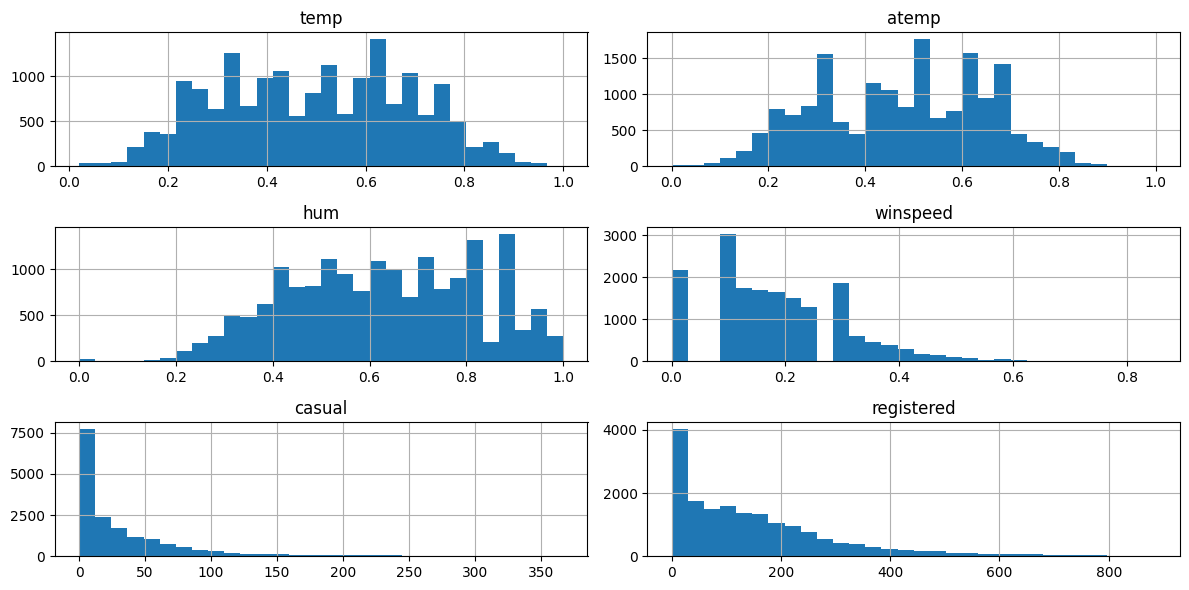

In [38]:
#Visualizacion de los datos
import matplotlib.pyplot as plt
import numpy as np

#   Column      Non-Null Count  Dtype         
#---  ------      --------------  -----         
# 0   dteday      17379 non-null  datetime64[ns]
# 1   season      17379 non-null  category      
# 2   yr          17379 non-null  category      
# 3   mnth        17379 non-null  category      
# 4   hr          17379 non-null  category      
# 5   holiday     17379 non-null  category      
# 6   weekday     17379 non-null  category      
# 7   workingday  17379 non-null  category      
# 8   weathersit  17379 non-null  category      
# 9   temp        17379 non-null  float64       
# 10  atemp       17379 non-null  float64       
# 11  hum         17379 non-null  float64       
# 12  windspeed   17379 non-null  float64       
# 13  casual      17379 non-null  int64         
# 14  registered  17379 non-null  int64         
# 15  cnt         17379 non-null  int64   

#Histogramas de las variables cuantitativas
plt.figure(figsize=(12,6))
plt.subplot(3, 2, 1)
bike_sharing_df_cleaned['temp'].hist(bins=30) 
plt.title("temp")
plt.subplot(3, 2, 2)
bike_sharing_df_cleaned['atemp'].hist(bins=30) 
plt.title("atemp")
plt.subplot(3, 2, 3)
bike_sharing_df_cleaned['hum'].hist(bins=30) 
plt.title("hum")
plt.subplot(3, 2, 4)
bike_sharing_df_cleaned['windspeed'].hist(bins=30) 
plt.title("winspeed")
plt.subplot(3, 2, 5)
bike_sharing_df_cleaned['casual'].hist(bins=30) 
plt.title("casual")
plt.subplot(3, 2, 6)
bike_sharing_df_cleaned['registered'].hist(bins=30) 
plt.title("registered")
plt.tight_layout()
plt.show()

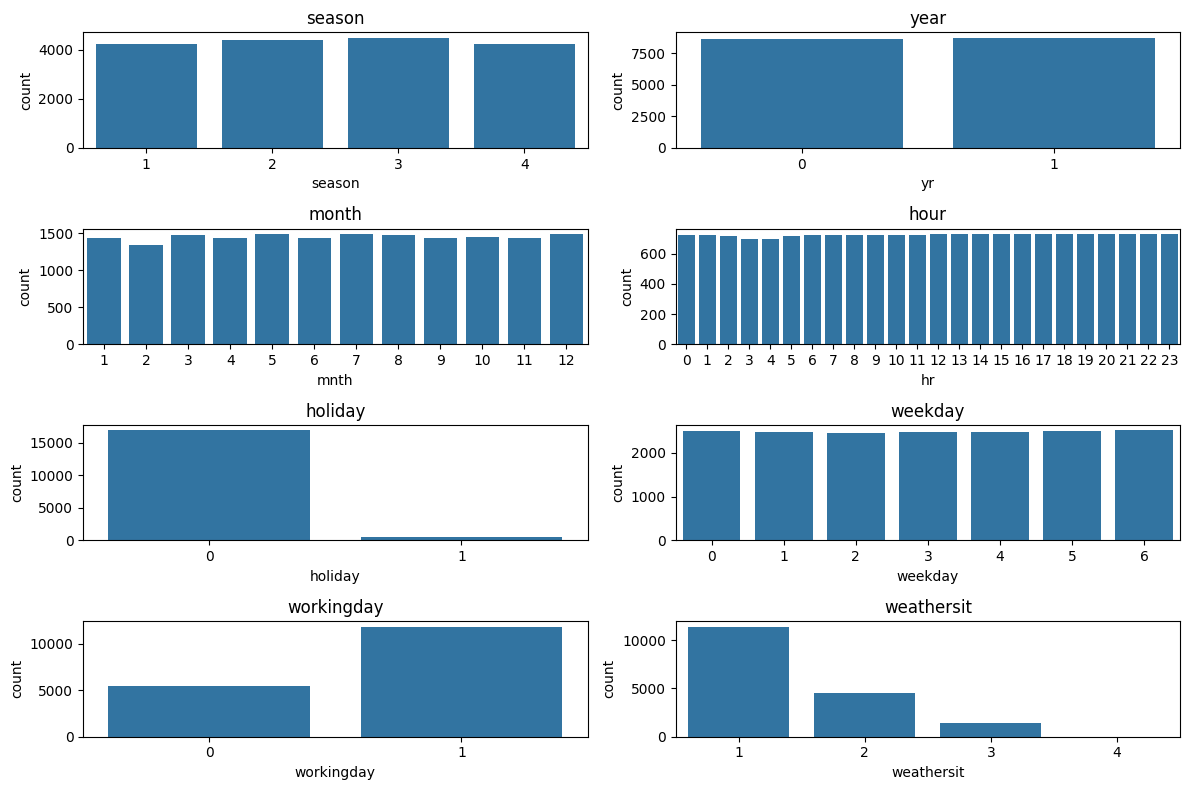

In [41]:


plt.figure(figsize=(12,8))
plt.subplot(4, 2, 1)
sns.countplot(x='season',data=bike_sharing_df_cleaned)
plt.title("season")
plt.subplot(4, 2, 2)
sns.countplot(x='yr',data=bike_sharing_df_cleaned)
plt.title("year")
plt.subplot(4, 2, 3)
sns.countplot(x='mnth',data=bike_sharing_df_cleaned)
plt.title("month")
plt.subplot(4, 2, 4)
sns.countplot(x='hr',data=bike_sharing_df_cleaned)
plt.title("hour")
plt.subplot(4, 2, 5)
sns.countplot(x='holiday',data=bike_sharing_df_cleaned)
plt.title("holiday")
plt.subplot(4, 2, 6)
sns.countplot(x='weekday',data=bike_sharing_df_cleaned)
plt.title("weekday")
plt.subplot(4, 2, 7)
sns.countplot(x='workingday',data=bike_sharing_df_cleaned)
plt.title("workingday")
plt.subplot(4, 2, 8)
sns.countplot(x='weathersit',data=bike_sharing_df_cleaned)
plt.title("weathersit")
plt.tight_layout()
plt.show()


OBSERVACIONES:
--> El dia de la semana y el año no parecen ser factores que determinen el resultado
--> Casual y registered son valores complementarios cuya suma es el total de las rentas

<Axes: >

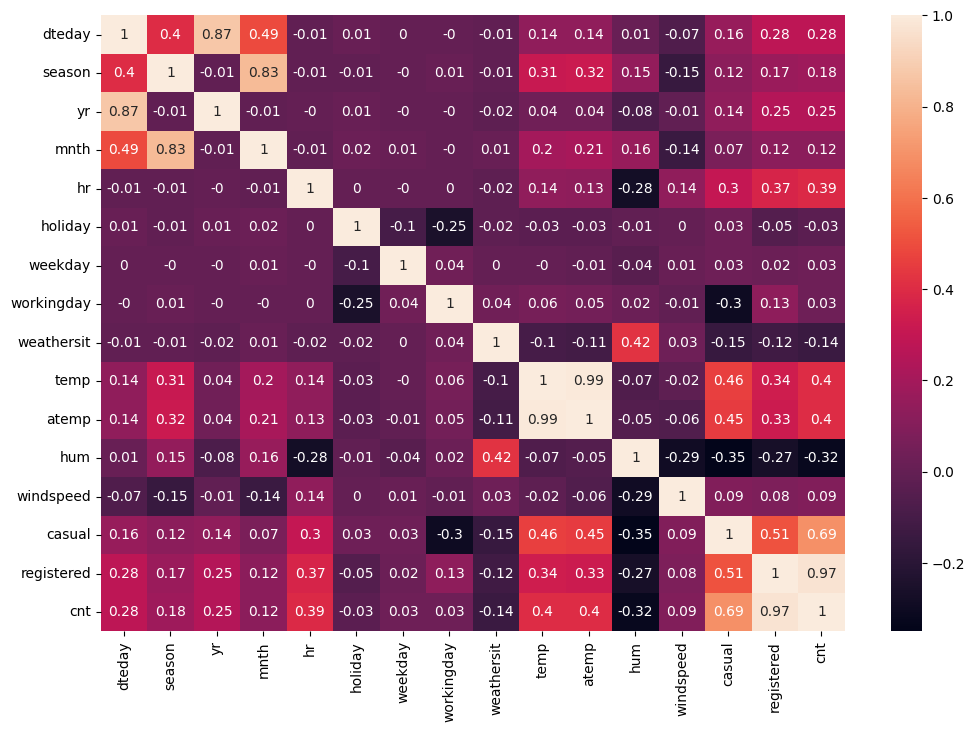

In [42]:
#Obtenemos el mapa de calor
plt.figure(figsize=(12,8))
dfCorrelation = bike_sharing_df_cleaned.corr(method='pearson')
sns.heatmap(round(dfCorrelation,2), annot=True)

Conclusiones:
-->Las variables "temp" y "atemp" tienen una correlacion cercana a 1, por lo que puede ser removida
-->Consideramos como caso de negocio, que el año no influye en la decisión, y si en dado caso se requiere ese detalle, se puede obtener del campo de fecha. Además el histograma mostró que tiene un acumulado de registros similar en ambos años. Tal vez si exisitieran mas años deberíamos considerar ese dato como un valor continuo y no como discreto.

In [43]:
#Eliminando la variable atemp
bike_sharing_df_cleaned = bike_sharing_df_cleaned.drop(columns=['atemp'])
bike_sharing_df_cleaned = bike_sharing_df_cleaned.drop(columns=['yr'])

In [44]:
def one_hot_encoding(df_original, columna_encoding):
    dummies = pd.get_dummies(df_original[[columna_encoding]])
    res_df = pd.concat([df_original, dummies], axis=1)
    res_df.drop([columna_encoding], axis='columns', inplace = True)
    return(res_df)

In [47]:
#Aplicar codificación one-hot a las variables categoricas restantes
# 1   season
# 3   mnth
# 4   hr
# 5   holiday
# 6   weekday
# 7   workingday
# 8   weathersit

bike_sharing_df_cleaned_oneHot = one_hot_encoding(bike_sharing_df_cleaned, 'season')
bike_sharing_df_cleaned_oneHot = one_hot_encoding(bike_sharing_df_cleaned_oneHot, 'mnth')
bike_sharing_df_cleaned_oneHot = one_hot_encoding(bike_sharing_df_cleaned_oneHot, 'hr')
bike_sharing_df_cleaned_oneHot = one_hot_encoding(bike_sharing_df_cleaned_oneHot, 'holiday')
bike_sharing_df_cleaned_oneHot = one_hot_encoding(bike_sharing_df_cleaned_oneHot, 'weekday')
bike_sharing_df_cleaned_oneHot = one_hot_encoding(bike_sharing_df_cleaned_oneHot, 'workingday')
bike_sharing_df_cleaned_oneHot = one_hot_encoding(bike_sharing_df_cleaned_oneHot, 'weathersit')

In [48]:
print(bike_sharing_df_cleaned_oneHot)

          dteday  temp   hum  windspeed  casual  registered  cnt  season_1  \
0     2011-01-01  0.24  0.81     0.0000       3          13   16      True   
1     2011-01-01  0.22  0.80     0.0000       8          32   40      True   
2     2011-01-01  0.22  0.80     0.0000       5          27   32      True   
3     2011-01-01  0.24  0.75     0.0000       3          10   13      True   
4     2011-01-01  0.24  0.75     0.0000       0           1    1      True   
...          ...   ...   ...        ...     ...         ...  ...       ...   
17374 2012-12-31  0.26  0.60     0.1642      11         108  119      True   
17375 2012-12-31  0.26  0.60     0.1642       8          81   89      True   
17376 2012-12-31  0.26  0.60     0.1642       7          83   90      True   
17377 2012-12-31  0.26  0.56     0.1343      13          48   61      True   
17378 2012-12-31  0.26  0.65     0.1343      12          37   49      True   

       season_2  season_3  ...  weekday_3  weekday_4  weekday_5

In [49]:
#Escalamiento de las variables numéricas

# 9   temp        17379 non-null  float64       
# 11  hum         17379 non-null  float64       
# 12  windspeed   17379 non-null  float64       
# 13  casual      17379 non-null  int64         
# 14  registered  17379 non-null  int64         

# 15  cnt         17379 non-null  int64  ---- Variable de salida, no se escalara

from sklearn import preprocessing

preproc= preprocessing.MinMaxScaler()
preproc.fit(bike_sharing_df_cleaned_oneHot[['temp','hum','windspeed', 'casual', 'registered']])

minmax_df=pd.DataFrame(preproc.transform(bike_sharing_df_cleaned_oneHot[['temp','hum','windspeed', 'casual', 'registered']]), columns=['temp','hum','windspeed', 'casual', 'registered'])
print(minmax_df.describe())

               temp           hum     windspeed        casual    registered
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000
mean       0.486722      0.627229      0.223460      0.097210      0.173574
std        0.196486      0.192930      0.143811      0.134346      0.170832
min        0.000000      0.000000      0.000000      0.000000      0.000000
25%        0.326531      0.480000      0.122840      0.010899      0.038375
50%        0.489796      0.630000      0.228047      0.046322      0.129797
75%        0.653061      0.780000      0.298225      0.130790      0.248307
max        1.000000      1.000000      1.000000      1.000000      1.000000


In [50]:
bike_sharing_df_cleaned_oneHot.head()

,dteday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,season_3,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,2011-01-01,0.24,0.81,0.0,3,13,16,True,False,False,...,False,False,False,True,True,False,True,False,False,False
1,2011-01-01,0.22,0.80,0.0,8,32,40,True,False,False,...,False,False,False,True,True,False,True,False,False,False
2,2011-01-01,0.22,0.80,0.0,5,27,32,True,False,False,...,False,False,False,True,True,False,True,False,False,False
3,2011-01-01,0.24,0.75,0.0,3,10,13,True,False,False,...,False,False,False,True,True,False,True,False,False,False
4,2011-01-01,0.24,0.75,0.0,0,1,1,True,False,False,...,False,False,False,True,True,False,True,False,False,False


In [51]:
X = bike_sharing_df_cleaned_oneHot.drop(columns=['cnt'])
y = bike_sharing_df_cleaned_oneHot['cnt']


In [52]:
X.shape

(17379, 61)

In [53]:
y.shape

(17379,)

Aplicando PCA

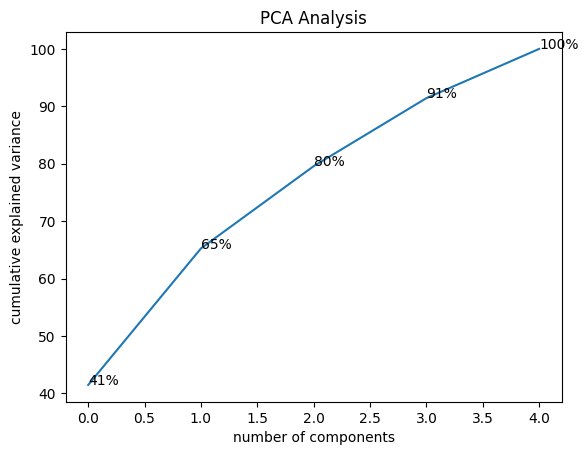

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#separamos los valores numericos
# 0   dteday      17379 non-null  datetime64[ns]
# 1   season      17379 non-null  category      
# 2   yr          17379 non-null  category      
# 3   mnth        17379 non-null  category      
# 4   hr          17379 non-null  category      
# 5   holiday     17379 non-null  category      
# 6   weekday     17379 non-null  category      
# 7   workingday  17379 non-null  category      
# 8   weathersit  17379 non-null  category      
# 9   temp        17379 non-null  float64       
# 10  atemp       17379 non-null  float64       
# 11  hum         17379 non-null  float64       
# 12  windspeed   17379 non-null  float64       
# 13  casual      17379 non-null  int64         
# 14  registered  17379 non-null  int64         
# 15  cnt         17379 non-null  int64   
num = X[['temp', 'hum', 'windspeed', 'casual', 'registered']]
total_components = num.shape[1]

sc = StandardScaler()
x_scaled = sc.fit_transform(num)
pca = PCA()
x_projected  = pca.fit_transform(x_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.title('PCA Analysis')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
labels = np.cumsum(pca.explained_variance_ratio_)*100
for i in range(total_components):
  plt.text(i,labels[i],str(format(labels[i],'.0f'))+'%')
